In [1]:
import numpy as np
import pandas as pd
import collections
data=pd.read_csv('iris.data',header=None)
x,y=data.shape
r,c=x,y
lis=data.iloc[:,4].unique()
dict={}
count=0
for i in lis:
    if i not in dict.keys():
        dict[i]=count
        count+=1
for i in range(0,x):
    data.iloc[i,4]=dict[data.iloc[i,4]]
list=[i for i in range(5,31)]
acc2=[]
for cl in list:
    print(cl)
    mem_matrix=np.random.random_sample((r,cl))
    mem_matrix=mem_matrix/np.sum(mem_matrix,axis=1).reshape(-1,1)
    m=np.random.rand(1)*np.random.randint(1,10)
    data1=data.to_numpy()
    cent=[]
    for i in range(0,cl):
        cent.append(np.sum(data1*((mem_matrix[:,i])**m).reshape(-1,1),axis=0)/np.sum((mem_matrix[:,i])**m))
    print(len(cent))
    l=np.zeros((r,1))
    for i in cent:
        l1=np.sqrt(np.sum((data1-i)**2,axis=1))
        l=np.hstack((l,l1.reshape(-1,1)))
    l=l[:,1:]
    new_mem_matrix=((1/l)**(1/(m-1)))/np.sum(((1/l)**(1/(m-1))),axis=0)
    l=np.argmin(new_mem_matrix,axis=1)
    for j in range(0,100):
        cent=[]
        mem_matrix=new_mem_matrix
        for i in range(0,cl):
            cent.append(np.sum(data1*((mem_matrix[:,i])**m).reshape(-1,1),axis=0)/np.sum((mem_matrix[:,i])**m))
        cent
        l=np.zeros((r,1))
        for i in cent:
            l1=np.sqrt(np.sum((data1-i)**2,axis=1))
            l=np.hstack((l,l1.reshape(-1,1)))
        l=l[:,1:]
        new_mem_matrix=((1/l)**(1/(m-1)))/np.sum(((1/l)**(1/(m-1))),axis=0)
        l=np.argmin(new_mem_matrix,axis=1)
    comp=np.hstack((l.reshape(-1,1),data1[:,4].reshape(-1,1)))
    gr=[0,1,2]
    acc=[]
    for i in range(0,cl):
        x=comp[comp[:,0]==i]
        t=[]
        for j in gr:
            t.append(len(x[x[:,1]==j]))
        acc.append(t)
    print(acc)
    count=0
    for i in acc:
        i.sort(reverse=True)
        count=count+i[0]
    acc2.append((count/r)*100)
acc2

5
5
[[18, 2, 0], [32, 25, 50], [0, 0, 0], [0, 0, 0], [0, 23, 0]]
6
6
[[0, 43, 50], [0, 0, 0], [50, 7, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
7
7


c:\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
c:\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


[[50, 50, 50], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
8
8
[[0, 0, 0], [0, 0, 0], [50, 27, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 23, 49], [0, 0, 0]]
9
9
[[0, 43, 50], [0, 0, 0], [0, 0, 0], [50, 7, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
10
10
[[50, 17, 1], [0, 0, 0], [0, 0, 0], [0, 33, 49], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
11
11
[[0, 4, 3], [0, 0, 0], [0, 3, 4], [0, 19, 0], [0, 16, 13], [3, 0, 0], [0, 0, 0], [0, 0, 0], [27, 0, 30], [0, 2, 0], [20, 6, 0]]
12
12
[[42, 7, 0], [0, 19, 43], [0, 0, 0], [0, 0, 0], [5, 16, 1], [0, 3, 6], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [3, 5, 0], [0, 0, 0]]
13
13
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 23, 49], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [50, 27, 1], [0, 0, 0]]
14
14
[[35, 14, 22], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [15, 36, 28], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 

[60.66666666666667,
 66.66666666666666,
 33.33333333333333,
 66.0,
 66.66666666666666,
 66.0,
 65.33333333333333,
 74.66666666666667,
 66.0,
 47.333333333333336,
 33.33333333333333,
 33.33333333333333,
 80.0,
 68.0,
 66.0,
 66.66666666666666,
 51.33333333333333,
 66.0,
 66.0,
 66.0,
 63.33333333333333,
 72.0,
 33.33333333333333,
 66.0,
 66.0,
 68.0]

Text(0, 0.5, 'Accuracy')

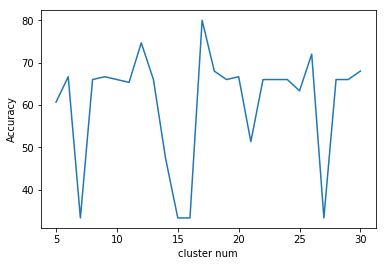

In [3]:
import matplotlib.pyplot as plt
plt.plot(list,acc2)
plt.xlabel('cluster num') 
plt.ylabel('Accuracy') 